In [1]:
cnfl=[false]
include("PVCR.jl");

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1186
┌ Warning: Module Conda with build ID 38462504167046 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

In [2]:
PVRes.capacity = 0.0
base_ebalance = annual_energy_balance(ice_residential, PVRes, print_output=false);
PVRes.capacity = 1.0
ts=simulate(ice_residential, PVRes, 3);

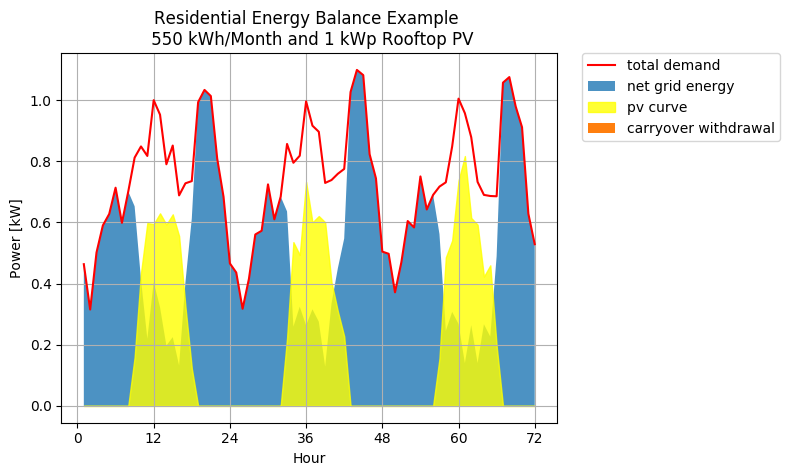

In [3]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 1 kWp Rooftop PV");

### Energy Balance for case residential 1

In [4]:
ebalance = annual_energy_balance(ice_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.84 149.68 0.0 396.16 73.34 0.0 0.0 396.16 0.0 1.19 1.19
2 545.41 121.91 0.0 423.5 133.08 0.0 0.0 423.5 0.0 1.31 1.31
3 553.57 119.8 0.0 433.78 191.78 0.0 0.0 433.78 0.0 1.19 1.19
4 540.57 139.45 0.0 401.12 260.11 0.0 0.0 401.12 0.0 1.21 1.21
5 553.89 154.25 0.0 399.64 335.69 0.0 0.0 399.64 0.0 1.21 1.21
6 555.82 140.19 0.0 415.63 404.39 0.0 0.0 415.63 0.0 1.24 1.24
7 538.6 142.03 0.0 396.56 473.98 0.0 0.0 396.56 0.0 1.16 1.16
8 547.16 118.8 0.0 428.36 532.19 0.0 0.0 428.36 0.0 1.19 1.19
9 536.94 148.11 0.0 388.83 604.77 0.0 0.0 388.83 0.0 1.19 1.19
10 559.76 156.75 0.0 403.01 681.57 0.0 0.0 403.01 0.0 1.21 1.21
11 557.76 118.72 0.0 439.04 739.75 0.0 0.0 439.04 0.0 1.24 1.24
12 558.25 155.36 0.0 402.89 815.87 0.0 0.0 402.89 0.0 1.21 1.21


### Billings case residential 1

In [5]:
bills_residential = Dict();  base_bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], ice_residential, print_output=true)
    base_bills_residential[m] = monthly_bill(base_ebalance[m], ice_residential, print_output=false)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
171578.27 0.0 0.0 198668.77  | 224025.8 25357.03
175507.56 0.0 0.0 203300.68  | 223953.31 20652.64
176984.26 0.0 0.0 205041.43  | 225335.6 20294.17
172291.21 0.0 0.0 199509.21  | 223133.04 23623.83
172078.87 0.0 0.0 199258.89  | 225389.58 26130.69
174376.18 0.0 0.0 201966.99  | 225716.3 23749.31
171636.45 0.0 0.0 198737.37  | 222798.77 24061.4
176206.02 0.0 0.0 204124.03  | 224249.58 20125.54
170525.52 0.0 0.0 197427.78  | 222518.21 25090.42
172563.53 0.0 0.0 199830.21  | 226384.7 26554.49
177740.66 0.0 0.0 205933.09  | 226045.06 20111.98
172545.93 0.0 0.0 199809.47  | 226128.51 26319.04


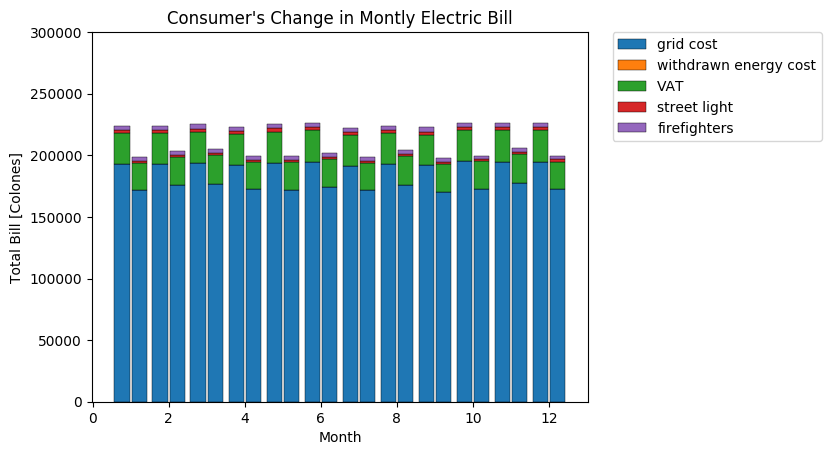

In [6]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

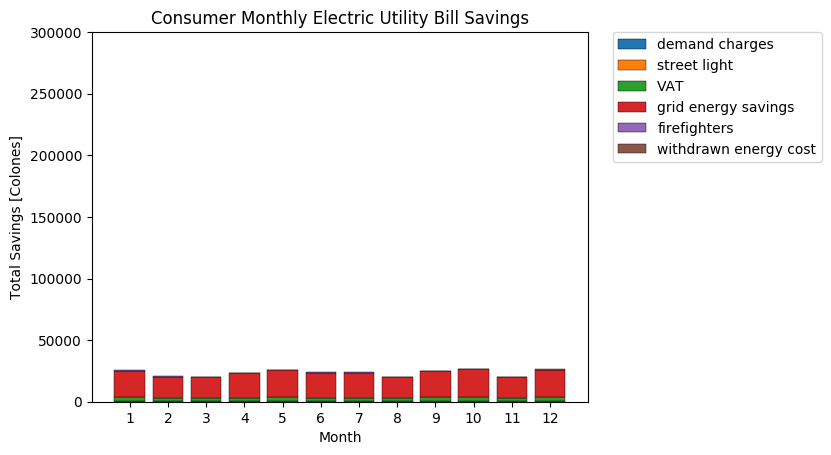

In [7]:
plot_savings(bills_residential);

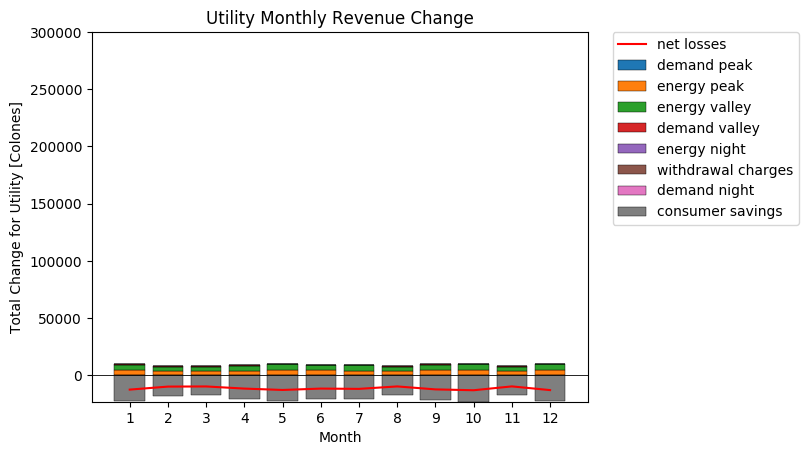

In [8]:
plot_utility_change(bills_residential);

## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [9]:
PVRes.capacity = 2.0
ts=simulate(ice_residential, PVRes, 3);

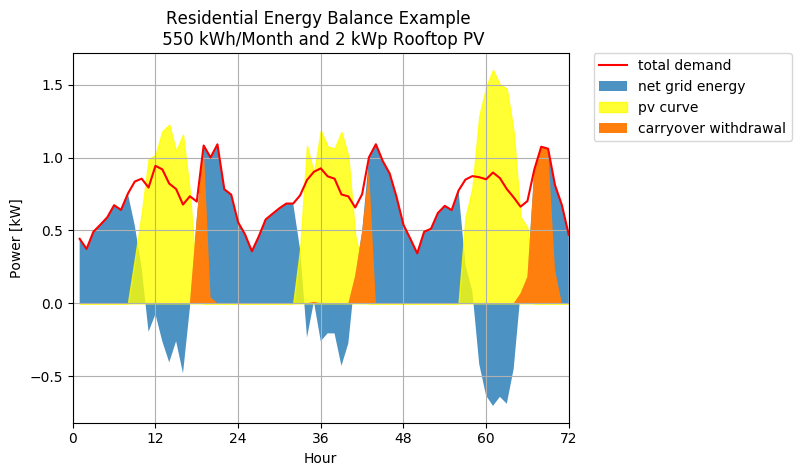

In [10]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 2 kWp Rooftop PV");

### Energy Balance for case residential 2

In [11]:
ebalance = annual_energy_balance(ice_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 545.69 254.76 31.64 322.58 124.83 31.64 31.64 290.94 0.0 1.18 1.18
2 547.61 204.99 9.11 351.73 193.63 9.11 9.11 342.62 0.0 1.29 1.29
3 552.5 234.14 31.98 350.34 299.26 31.98 31.98 318.36 0.0 1.19 1.19
4 539.52 256.94 51.72 334.29 393.18 51.72 51.72 282.58 0.0 1.19 1.19
5 553.31 291.2 51.06 313.18 484.15 51.06 51.06 262.11 0.0 1.2 1.2
6 555.09 274.73 51.63 331.99 567.7 51.63 51.63 280.36 0.0 1.21 1.21
7 537.38 274.65 56.61 319.34 650.65 56.61 56.61 262.73 0.0 1.17 1.17
8 546.17 238.67 34.89 342.4 710.99 34.89 34.89 307.5 0.0 1.19 1.19
9 536.84 271.91 68.09 333.02 809.33 68.09 68.09 264.93 0.0 1.21 1.21
10 558.15 282.18 52.57 328.54 879.51 52.57 52.57 275.97 0.0 1.21 1.21
11 558.41 282.91 53.4 328.9 965.57 53.4 53.4 275.5 0.0 1.25 1.25
12 559.55 276.14 51.04 334.45 1047.47 51.04 51.04 283.4 0.0 1.21 1.21


### Billings case residential 2

In [12]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], ice_residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
156456.69 665.42 0.0 181749.22  | 224001.25 42252.03
163884.43 191.53 0.0 189859.94  | 224325.31 34465.37
160397.58 672.58 0.0 186404.55  | 225154.17 38749.62
155255.61 1087.58 0.0 180908.13  | 222955.41 42047.28
152314.71 1073.82 0.0 177422.63  | 225291.69 47869.06
154936.52 1085.79 0.0 180529.54  | 225592.11 45062.57
152403.64 1190.49 0.0 177686.3  | 222592.82 44906.52
158837.55 733.82 0.0 184648.93  | 224082.17 39433.23
152719.19 1431.91 0.0 178386.97  | 222500.71 44113.75
154305.37 1105.55 0.0 179812.44  | 226110.59 46298.15
154238.55 1123.03 0.0 179757.47  | 226155.8 46398.33
155374.37 1073.42 0.0 181028.85  | 226347.99 45319.14


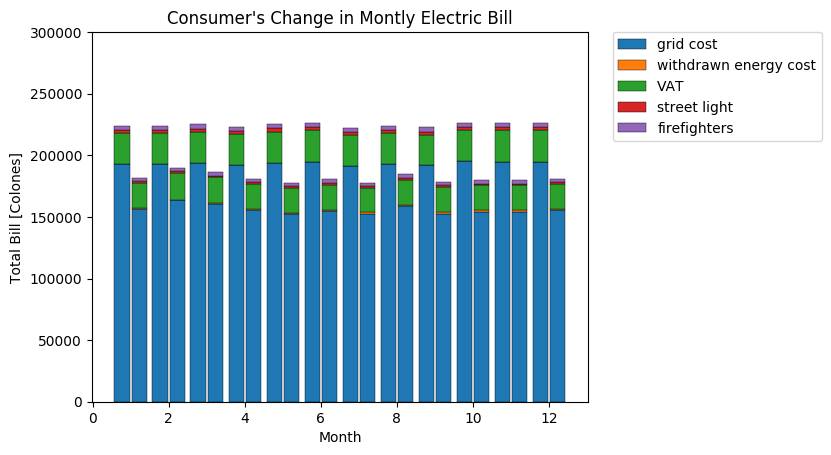

In [13]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

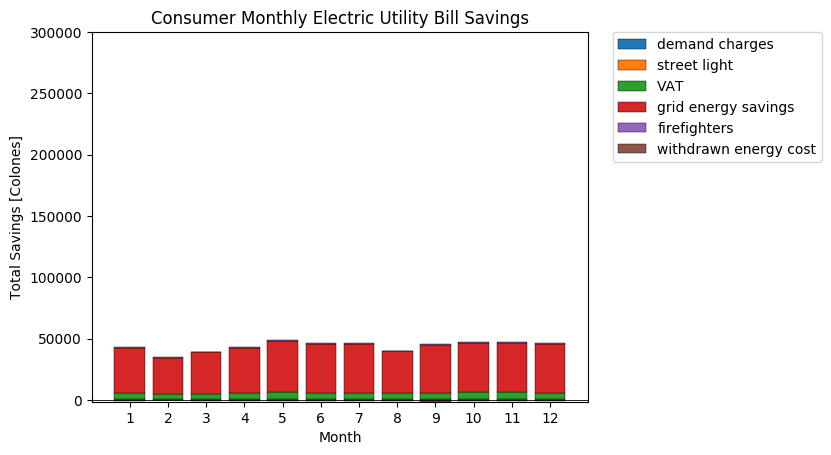

In [14]:
plot_savings(bills_residential);

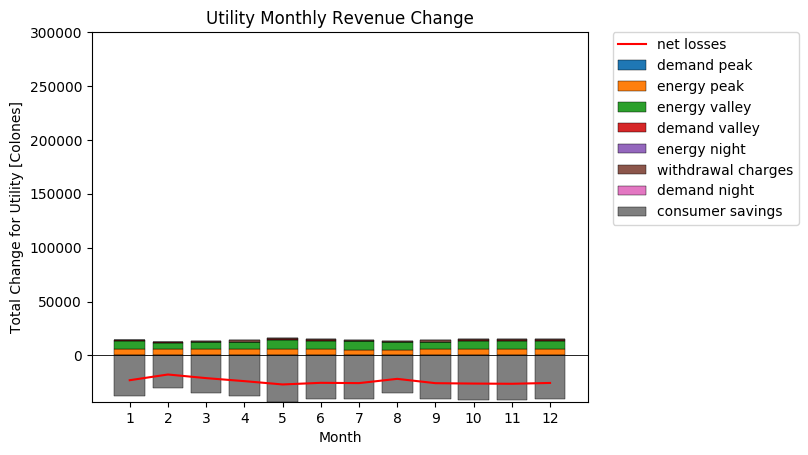

In [15]:
plot_utility_change(bills_residential);

## Residential Case 3: Large PV System that generates multi-day carry over

In [16]:
PVRes.capacity = 4.0
ts=simulate(ice_residential, PVRes, 3);

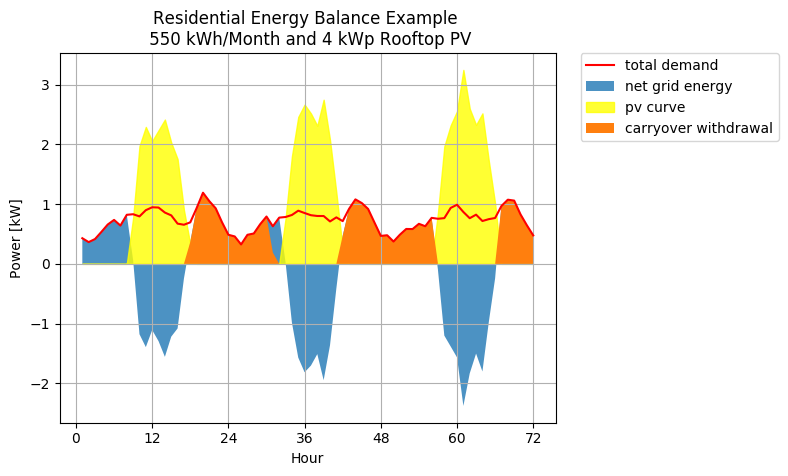

In [17]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Residential Energy Balance Example \n 550 kWh/Month and 4 kWp Rooftop PV");

### Energy Balance for case residential 3

In [18]:
ebalance = annual_energy_balance(ice_residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 546.58 573.14 327.5 300.93 280.84 280.84 280.84 0.0 0.0 1.18 1.18
2 545.92 410.94 175.01 310.0 201.36 175.01 175.01 134.98 0.0 1.3 1.3
3 554.93 535.6 283.39 302.72 288.79 283.39 283.39 19.33 0.0 1.2 1.2
4 540.77 596.66 352.79 296.9 297.76 297.76 296.9 0.0 0.86 1.21 1.21
5 554.77 569.42 319.15 304.5 279.88 279.88 279.88 0.0 0.0 1.21 1.21
6 559.05 569.29 324.64 314.4 278.95 278.95 278.95 0.0 0.0 1.23 1.23
7 539.19 592.22 348.21 295.18 290.19 290.19 290.19 0.0 0.0 1.16 1.16
8 547.52 529.63 300.62 318.51 259.52 259.52 259.52 17.89 0.0 1.19 1.19
9 539.49 570.58 326.72 295.63 279.59 279.59 279.59 0.0 0.0 1.2 1.2
10 557.92 613.7 380.3 324.52 300.71 300.71 300.71 0.0 0.0 1.21 1.21
11 558.46 608.79 356.69 306.36 298.31 298.31 298.31 0.0 0.0 1.25 1.25
12 559.94 615.98 373.9 317.86 301.83 301.83 301.83 0.0 0.0 1.2 1.2


### Billings case residential 3

In [19]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], ice_residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
3189.6 5906.06 0.0 8131.38  | 224150.52 216019.14
135078.31 3680.56 0.0 160620.8  | 224039.55 63418.75
61667.02 5959.6 0.0 78963.78  | 225565.62 146601.84
3189.6 6243.88 0.0 8500.92  | 223167.11 214666.19
3189.6 5885.78 0.0 8124.16  | 225538.49 217414.32
3189.6 5866.36 0.0 8146.43  | 226263.88 218117.45
3189.6 6102.62 0.0 8331.08  | 222899.93 214568.86
57072.76 5457.66 0.0 73186.95  | 224310.71 151123.75
3189.6 5879.7 0.0 8077.3  | 222950.45 214873.15
3189.6 6323.98 0.0 8717.1  | 226071.58 217354.47
3189.6 6273.41 0.0 8577.35  | 226162.95 217585.6
3189.6 6347.49 0.0 8714.1  | 226414.67 217700.56


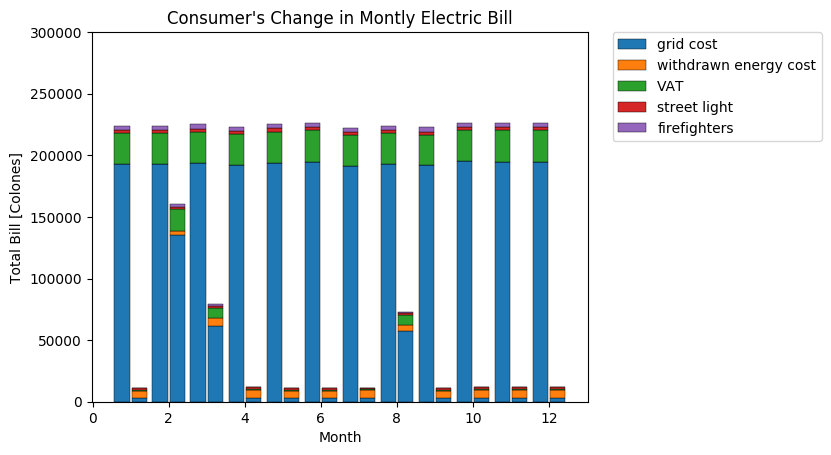

In [21]:
plot_bill(base_bills_residential, bills_residential, ["grid_cost", "withdrawn_energy_cost", "VAT", "street_light", "firefighters"]);

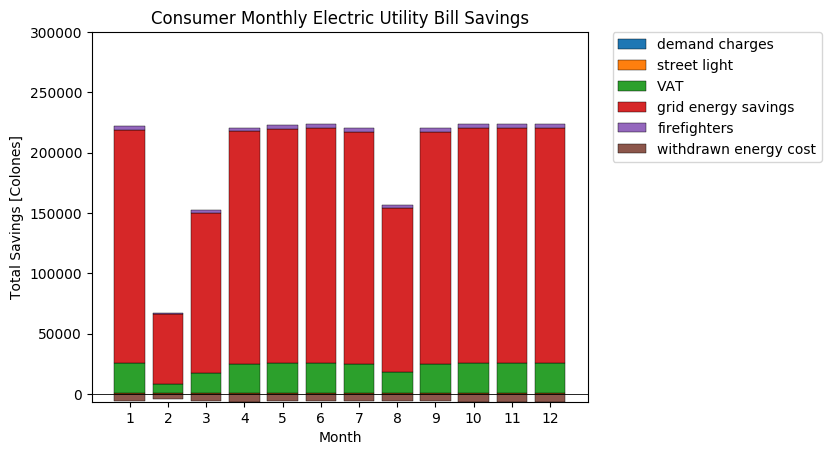

In [22]:
plot_savings(bills_residential);

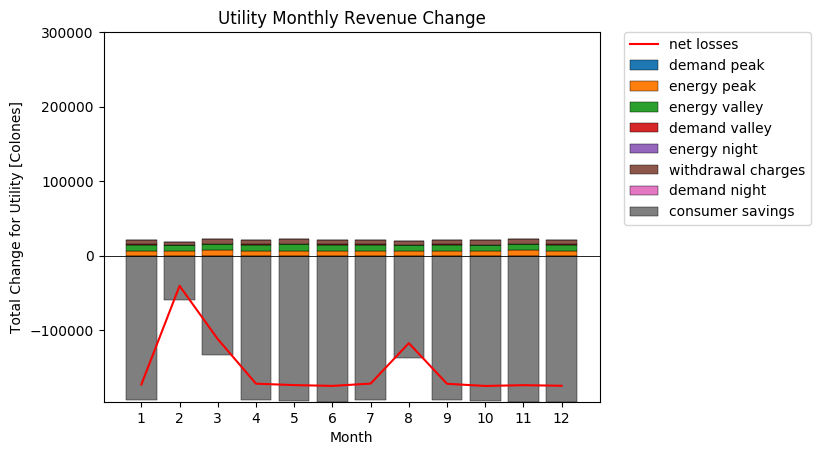

In [23]:
plot_utility_change(bills_residential);

# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

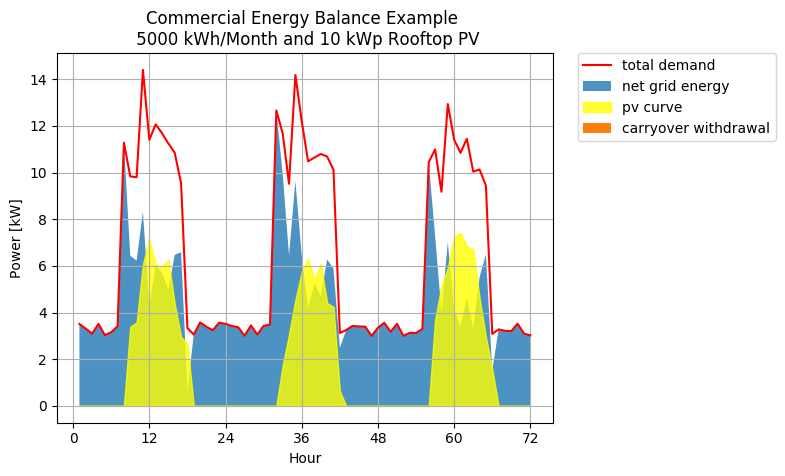

PyObject Text(0.5, 1, 'Commercial Energy Balance Example \n 5000 kWh/Month and 10 kWp Rooftop PV')

In [24]:
PVComInd.capacity = 0.0
base_ebalance = annual_energy_balance(ice_commercial, PVComInd, print_output=false);
PVComInd.capacity = 10.0
ts=simulate(ice_commercial, PVComInd, 3);
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 10 kWp Rooftop PV")

In [25]:
ebalance = annual_energy_balance(ice_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 5014.26 1248.98 0.0 3765.28 612.0 0.0 0.0 3765.28 0.0 14.9 11.79
2 5098.06 1109.81 0.0 3988.25 1155.8 0.0 0.0 3988.25 0.0 16.87 13.33
3 4846.76 1264.41 0.0 3582.34 1775.37 0.0 0.0 3582.34 0.0 14.5 11.04
4 5037.05 1361.04 0.0 3676.01 2442.28 0.0 0.0 3676.01 0.0 15.41 11.39
5 5339.44 1408.38 0.0 3931.06 3132.38 0.0 0.0 3931.06 0.0 15.94 11.84
6 5200.94 1300.06 0.0 3900.88 3769.41 0.0 0.0 3900.88 0.0 16.01 11.79
7 4966.31 1403.29 0.0 3563.02 4457.03 0.0 0.0 3563.02 0.0 14.81 11.01
8 4997.69 1327.74 0.0 3669.94 5107.62 0.0 0.0 3669.94 0.0 14.55 9.89
9 4905.56 1380.63 0.0 3524.92 5784.13 0.0 0.0 3524.92 0.0 15.03 10.48
10 4734.95 1363.91 0.0 3371.04 6452.45 0.0 0.0 3371.04 0.0 14.11 10.43
11 4919.09 1401.31 0.0 3517.78 7139.09 0.0 0.0 3517.78 0.0 14.94 10.08
12 4860.43 1508.78 0.0 3351.65 7878.39 0.0 0.0 3351.65 0.0 14.39 9.97


In [26]:
bills_commercial = Dict()
base_bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], ice_commercial, print_output=true)
    base_bills_commercial[m] = monthly_bill(base_ebalance[m], ice_commercial, print_output=false)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
270573.23 0.0 11878.17 341056.75  | 360324.86 11878.17 449667.15  | 108610.4
286595.68 0.0 11878.17 360445.87  | 366346.38 11878.17 456953.92  | 96508.06
257427.08 0.0 11878.17 325148.31  | 348287.9 11878.17 435100.97  | 109952.66
264158.18 0.0 11878.17 333293.76  | 361962.42 11878.17 451648.8  | 118355.04
282485.96 0.0 11878.17 355472.61  | 383692.25 11878.17 477944.54  | 122471.93
280317.35 0.0 11878.17 352848.33  | 373739.84 11878.17 465900.91  | 113052.58
256038.52 0.0 11878.17 323467.98  | 356879.25 11878.17 445497.55  | 122029.56
263722.23 0.0 11878.17 332766.21  | 359133.64 11878.17 448225.64  | 115459.43
253300.9 0.0 11878.17 320155.13  | 352513.26 11878.17 440214.17  | 120059.04
242242.84 0.0 11878.17 306773.53  | 340253.43 11878.17 425378.28  | 118604.75
252787.82 0.0 11878.17 319534.24  | 353485.89 11878.17 441391.17  |

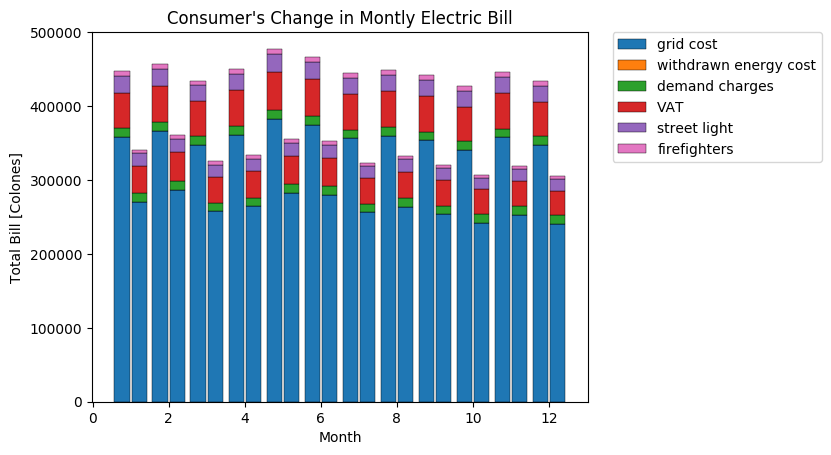

In [27]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

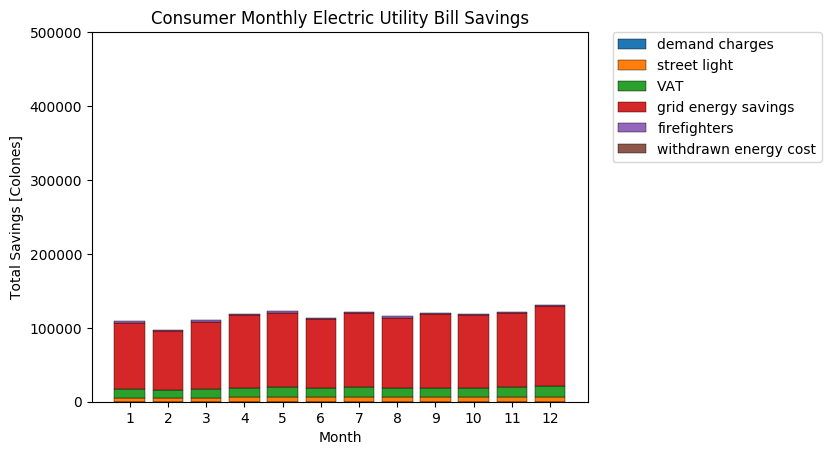

In [28]:
plot_savings(bills_commercial);

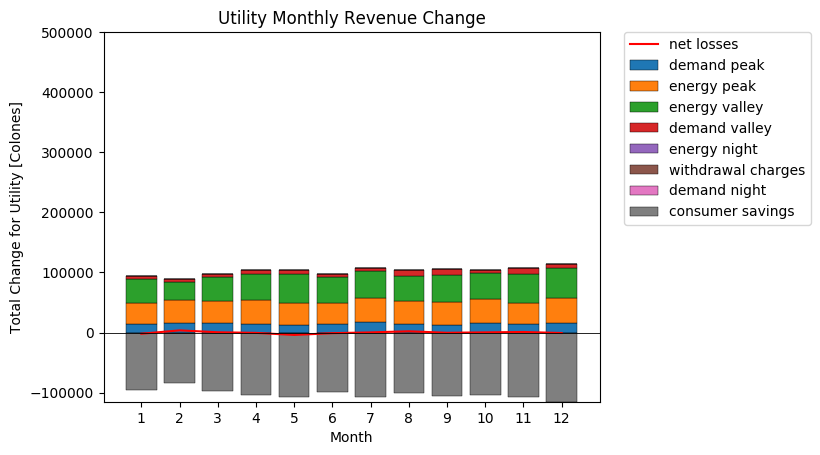

In [29]:
plot_utility_change(bills_commercial);

## Commercial case 2: medium PV system

In [40]:
PVComInd.capacity = 21.0
ts=simulate(ice_commercial, PVComInd, 3);

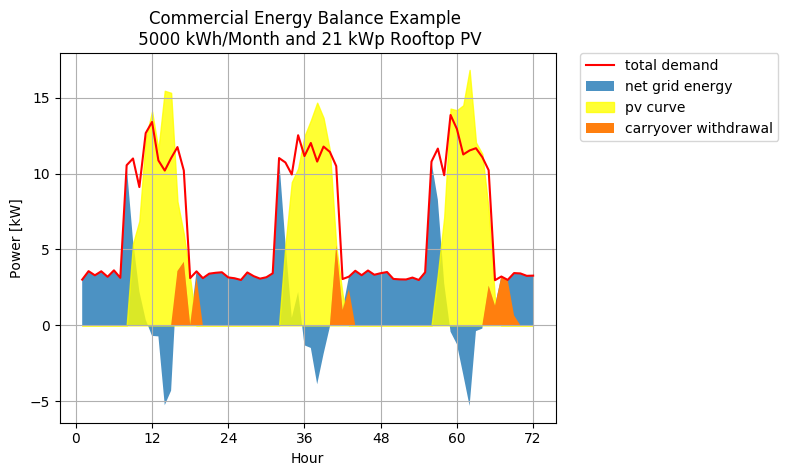

In [41]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 21 kWp Rooftop PV");

In [42]:
ebalance = annual_energy_balance(ice_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4971.62 2855.42 66.96 2183.16 1399.16 66.96 66.96 2116.2 0.0 14.85 8.27
2 5114.44 2374.34 21.67 2761.77 2495.62 21.67 21.67 2740.09 0.0 16.86 10.4
3 4867.2 3056.77 206.7 2017.12 3971.77 206.7 206.7 1810.43 0.0 14.36 6.97
4 5037.27 2789.47 81.92 2329.72 5131.91 81.92 81.92 2247.8 0.0 15.42 8.28
5 5355.06 2932.16 39.35 2462.25 6486.75 39.35 39.35 2422.9 0.0 15.92 9.62
6 5166.51 2896.36 203.74 2473.88 7866.62 203.74 203.74 2270.15 0.0 15.91 10.21
7 4977.19 3128.48 165.85 2014.57 9195.83 165.85 165.85 1848.72 0.0 14.81 8.5
8 5026.26 2855.69 104.52 2275.09 10429.27 104.52 104.52 2170.57 0.0 14.92 6.76
9 4918.11 2975.59 222.72 2165.24 11782.79 222.72 222.72 1942.53 0.0 15.11 6.87
10 4753.04 3086.23 303.29 1970.09 13072.33 303.29 303.29 1666.81 0.0 13.87 9.71
11 4965.57 2696.71 75.18 2344.04 14090.43 75.18 75.18 2268.86 0.0 15.27 9.8

In [43]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_cost", " ", "total_cost", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], ice_commercial, print_output=true)
end

grid_cost withdrawn_energy_cost demand_cost total_cost | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
254155.73 1408.22 0.0 303083.87  | 357260.58 11878.17 445959.01  | 142875.14
329085.28 455.81 0.0 390576.36  | 367523.39 11878.17 458378.25  | 67801.9
217432.22 4346.8 0.0 263568.48  | 349757.01 11878.17 436878.77  | 173310.29
269960.44 1722.82 0.0 322240.28  | 361978.27 11878.17 451667.98  | 129427.7
290990.3 827.51 0.0 345941.05  | 384814.52 11878.17 479302.62  | 133361.57
272644.5 4284.62 0.0 328908.65  | 371265.28 11878.17 462906.39  | 133997.74
222030.74 3487.85 0.0 267848.14  | 357660.94 11878.17 446443.49  | 178595.36
260685.52 2197.97 0.0 311896.7  | 361187.3 11878.17 450710.81  | 138814.11
233297.47 4683.71 0.0 282826.99  | 353415.7 11878.17 441306.23  | 158479.25
200183.77 6378.1 0.0 245895.17  | 341553.69 11878.17 426951.75  | 181056.57
272490.41 1580.94 0.0 325045.04  | 356826.16 11878.17 445433.31  | 120388.26
246588.93 2340.82 0.0 2

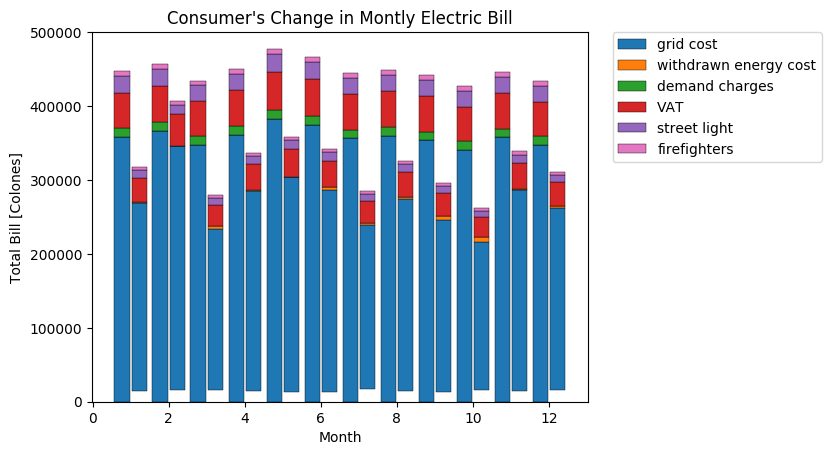

In [44]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

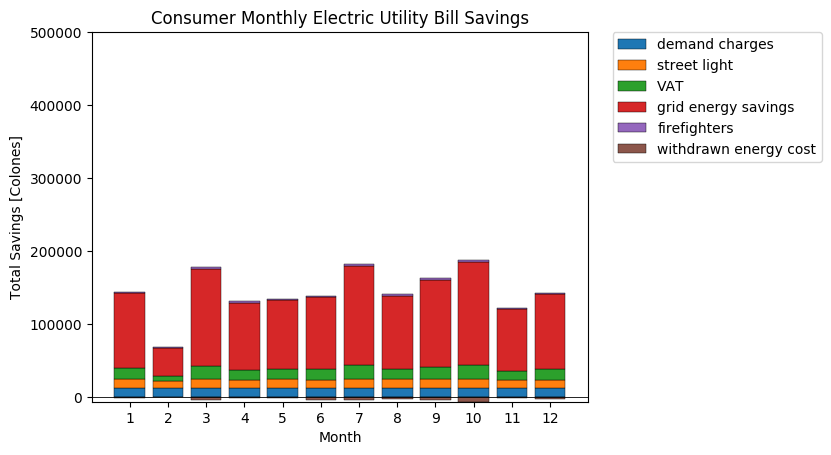

In [45]:
plot_savings(bills_commercial);

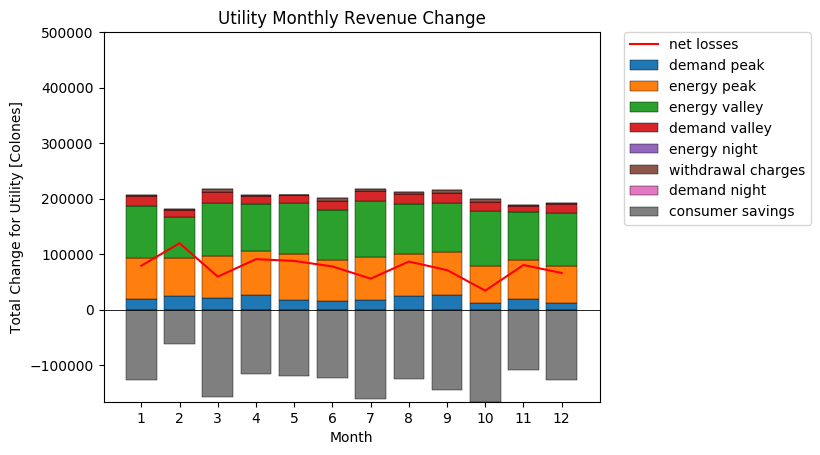

In [46]:
plot_utility_change(bills_commercial);

## Commercial case 3: Large PV system

In [47]:
PVComInd.capacity = 32.0
ts=simulate(ice_commercial, PVComInd, 3);

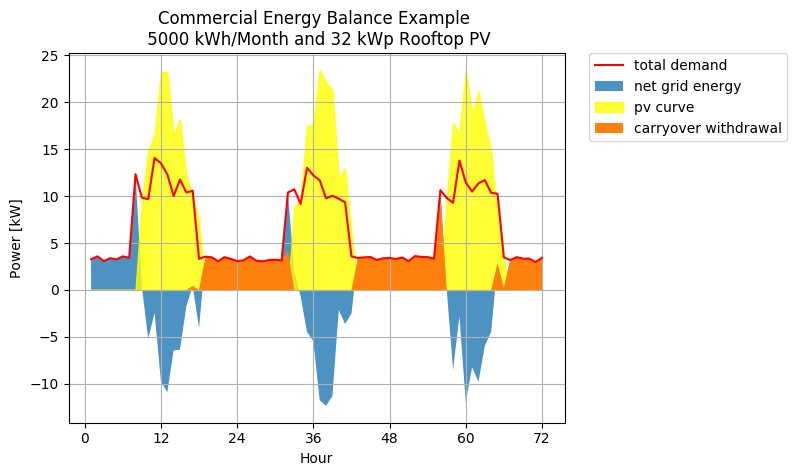

In [48]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Commercial Energy Balance Example \n 5000 kWh/Month and 32 kWp Rooftop PV");

In [49]:
ebalance = annual_energy_balance(ice_commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 5008.42 4443.96 1402.28 1966.74 2177.54 1402.28 1402.28 564.46 0.0 14.9 8.45
2 5112.06 3448.18 566.4 2230.29 2464.87 566.4 566.4 1663.88 0.0 16.84 10.33
3 4838.02 4069.78 1064.94 1833.18 3892.66 1064.94 1064.94 768.24 0.0 14.44 6.09
4 5046.72 4429.66 1202.8 1819.86 4998.25 1202.8 1202.8 617.06 0.0 15.43 8.34
5 5379.83 4487.34 1227.74 2120.23 5994.25 1227.74 1227.74 892.49 0.0 15.95 10.2
6 5175.82 4777.98 1342.13 1739.97 7107.72 1342.13 1342.13 397.84 0.0 16.02 5.62
7 4986.69 4742.3 1795.16 2039.54 8089.31 1795.16 1795.16 244.39 0.0 14.75 9.74
8 5014.19 3822.24 787.94 1979.89 8167.05 787.94 787.94 1191.95 0.0 14.75 6.66
9 4940.61 4201.72 1045.13 1784.02 9437.96 1045.13 1045.13 738.89 0.0 15.06 7.56
10 4745.36 4146.27 1376.62 1975.71 10424.49 1376.62 1376.62 599.09 0.0 14.19 8.5
11 4949.48 4579.08 1230.54 1600.94 11291.63 1230.5

In [50]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], ice_commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
67791.42 29489.94 0.0 120480.68  | 359904.97 11878.17 449159.04  | 328678.36
199832.45 11911.45 0.0 253012.41  | 367352.7 11878.17 458171.69  | 205159.28
92265.45 22395.64 0.0 139822.9  | 347659.93 11878.17 434341.05  | 294518.15
74108.55 25294.87 0.0 122254.77  | 362657.11 11878.17 452489.47  | 330234.69
107188.24 25819.43 0.0 162167.36  | 386594.35 11878.17 481456.43  | 319289.08
47780.26 28225.03 0.0 95045.93  | 371934.46 11878.17 463716.18  | 368670.25
29350.93 37752.11 0.0 86178.68  | 358343.41 11878.17 447269.36  | 361090.68
143153.39 16570.4 0.0 192192.57  | 360319.57 11878.17 449660.75  | 257468.18
88740.32 21979.19 0.0 135078.74  | 355032.16 11878.17 443262.34  | 308183.6
71951.29 28950.23 0.0 124675.19  | 341001.8 11878.17 426283.9  | 301608.71
44485.17 25878.16 0.0 87946.14  | 355669.8 11878.17 444033.96  | 356087.82
31

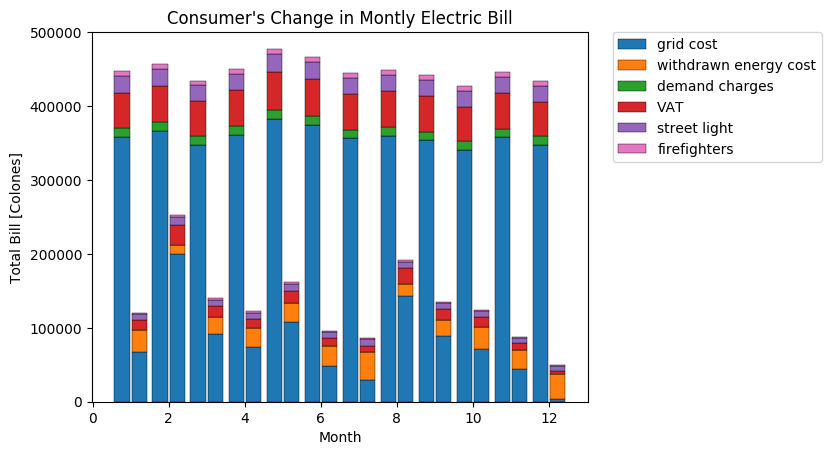

In [51]:
plot_bill(base_bills_commercial, bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

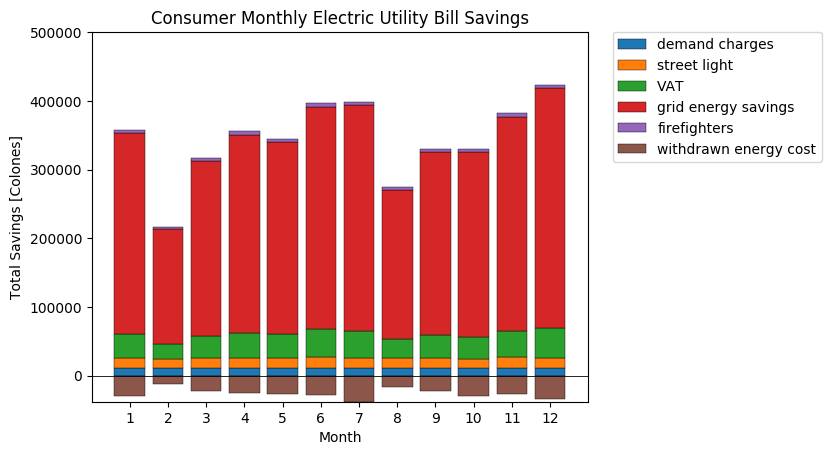

In [52]:
plot_savings(bills_commercial);

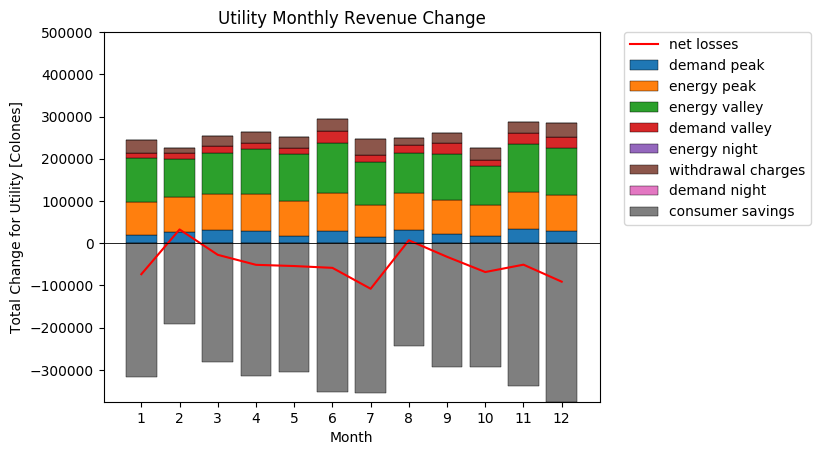

In [53]:
plot_utility_change(bills_commercial);

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

In [54]:
PVTMT.capacity = 0.0
base_ebalance = annual_energy_balance(ice_mediumvoltage, PVTMT, print_output=false);
PVTMT.capacity = 30.0
ts=simulate(ice_mediumvoltage, PVTMT, 3);

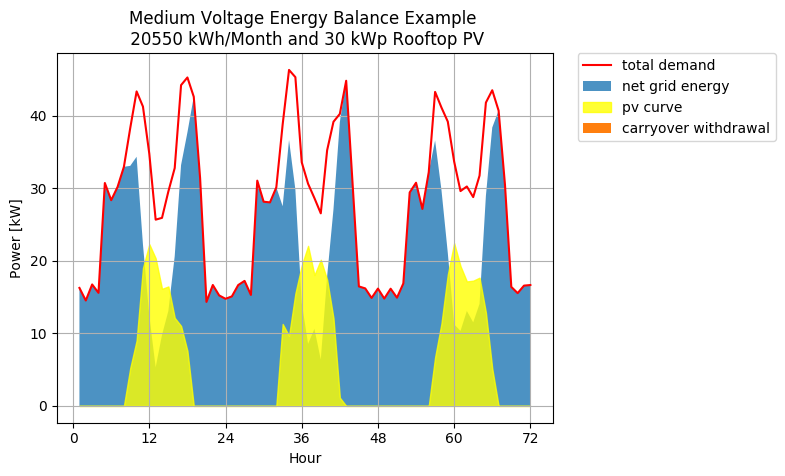

In [55]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 30 kWp Rooftop PV");

In [56]:
ebalance = annual_energy_balance(ice_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7558.42 7788.08 5759.16  | 4375.35 0.0 2143.92 0.0  | 5844.83 5126.31 5759.16  | 4375.35 0.0 0.0  | 46.57 46.53 35.74  | 46.57 37.52 35.74 
2 | 6898.01 7059.1 5303.46  | 3596.15 0.0 3906.04 0.0  | 5482.38 4878.58 5303.46  | 7971.5 0.0 0.0  | 47.18 46.98 36.36  | 47.1 33.11 36.36 
3 | 7584.98 7663.56 5788.31  | 3640.77 0.0 5690.01 0.0  | 5903.22 5704.56 5788.31  | 11612.27 0.0 0.0  | 46.61 46.41 35.9  | 46.54 33.45 35.9 
4 | 7829.92 7992.43 5983.69  | 4358.74 0.0 7825.8 0.0  | 5852.22 5611.38 5983.69  | 15971.02 0.0 0.0  | 49.81 49.77 38.39  | 49.81 32.97 38.39 
5 | 7577.7 7630.08 5786.53  | 4458.08 0.0 10010.25 0.0  | 5559.21 519

In [57]:
bills_TMT= Dict(); base_bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], ice_mediumvoltage, print_output=true)
    base_bills_TMT[m] = monthly_bill(base_ebalance[m], ice_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
402708.89 131233.53 90764.33  | 0.0  | 520774.9 199374.75 90764.33  | 520693.41 292911.22 178717.35  | 520693.41 363229.8 178717.35  | 314052.45 
525710.05 195901.94 91015.92  | 0.0  | 525710.05 195901.94 91015.92  | 520101.36 356490.54 178402.94  | 520101.36 356490.54 178402.94  | 0.0 
377736.27 124891.57 83582.52  | 0.0  | 475272.85 180713.0 83582.52  | 526594.8 258524.35 181832.62  | 527575.11 366747.57 181832.62  | 317472.05 
478641.98 181153.07 83783.81  | 0.0  | 478641.98 181153.07 83783.81  | 529727.52 368759.67 182097.11  | 529727.52 368759.67 182097.11  | 0.0 
406731.59 146036.69 91223.7  | 0.0  |

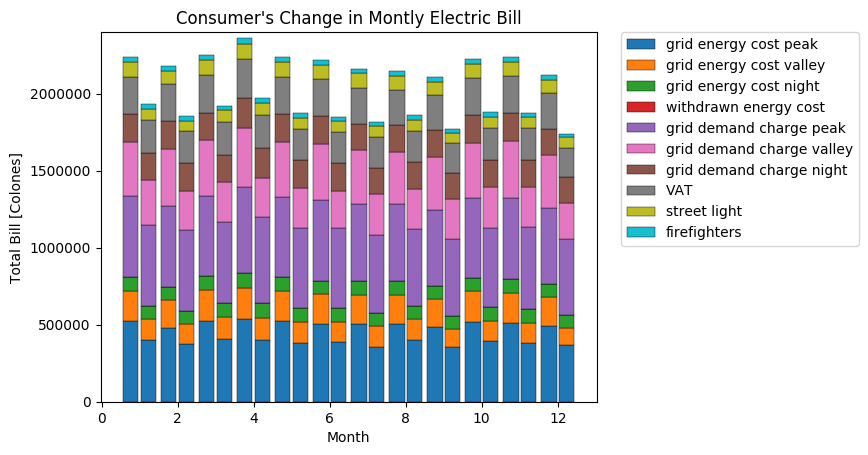

In [58]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields, 2);

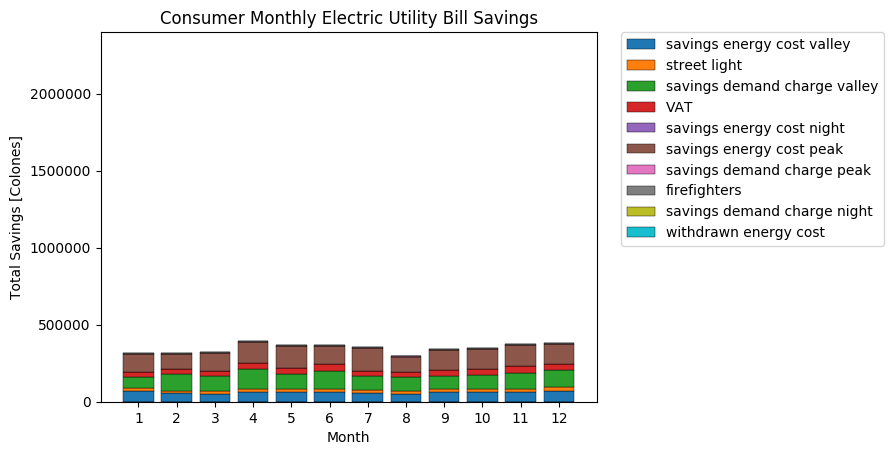

In [59]:
plot_savings(bills_TMT, 2);

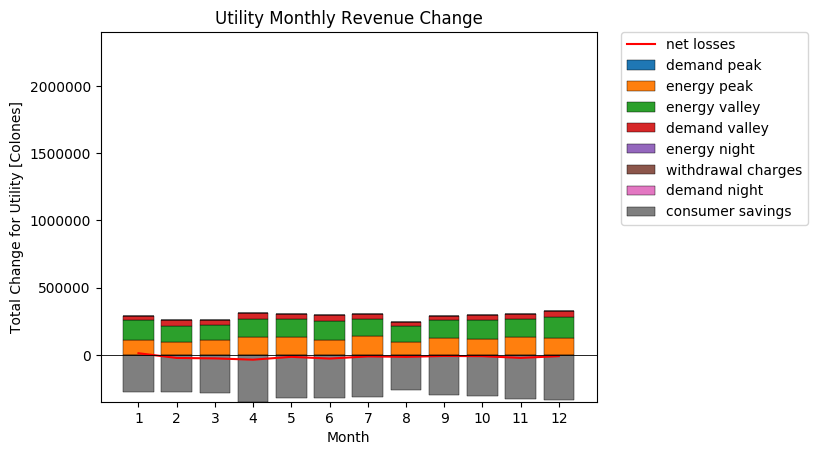

In [60]:
plot_utility_change(bills_TMT,2);

## TMT Case2: Medium PV System

In [61]:
PVTMT.capacity = 75
ts=simulate(ice_mediumvoltage, PVTMT, 3);

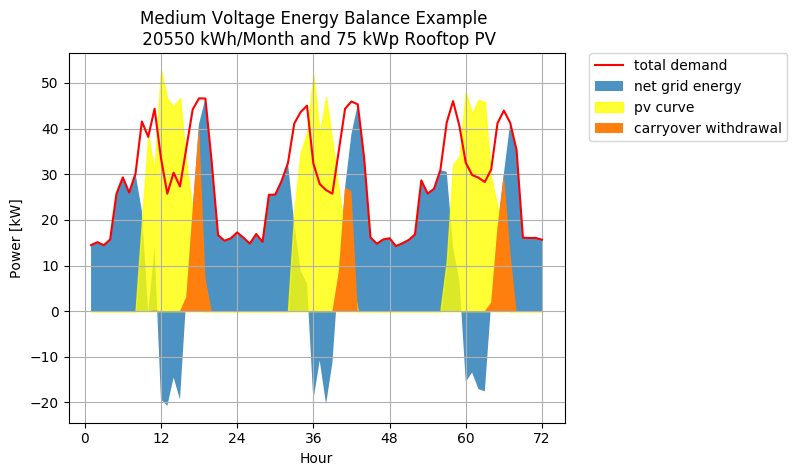

In [62]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 75 kWp Rooftop PV");

In [63]:
ebalance = annual_energy_balance(ice_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7585.92 7769.04 5807.11  | 10311.73 1295.86 5052.75 1295.86  | 3690.16 2648.93 5807.11  | 10311.73 1295.86 0.0  | 46.49 46.59 35.73  | 46.49 30.93 35.73 
2 | 6925.42 7049.54 5281.19  | 8166.45 1036.6 7758.45 1036.6  | 3360.37 3484.74 5281.19  | 18478.17 2332.46 0.0  | 47.37 47.23 36.11  | 47.37 31.52 36.11 
3 | 7608.54 7697.91 5795.18  | 9973.48 1657.29 11608.85 1657.29  | 3972.9 3017.35 5795.18  | 28451.66 3989.75 0.0  | 46.63 46.58 35.61  | 46.57 31.05 35.61 
4 | 7877.45 8022.43 6031.37  | 10692.72 1675.82 15191.0 1675.82  | 3984.27 2898.72 6031.37  | 39144.38 5665.57 0.0  | 49.8 49.88 38.21  | 49.78 33.2 38.21 
5 | 7607.42 770

In [64]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], ice_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
213742.67 49690.28 91520.1  | 27251.86  | 522670.17 198887.54 91520.1  | 519770.49 241458.4 178665.25  | 519770.49 363754.28 178665.25  | 675332.6 
207384.67 71643.5 83231.51  | 21799.75  | 477161.66 180468.12 83231.51  | 529675.29 246096.09 180583.02  | 529675.29 368722.17 180583.02  | 582227.86 
221836.65 54099.73 91332.05  | 34852.75  | 524228.07 197066.48 91332.05  | 520709.75 242383.6 178086.82  | 521408.94 363649.83 178086.82  | 648433.19 
234596.1 46138.46 95054.32  | 35242.53  | 542756.27 205374.27 95054.32  | 556586.86 259201.7 191057.67  | 556879.07 389370.58 191057.67  | 686176.22 
237755.04 444

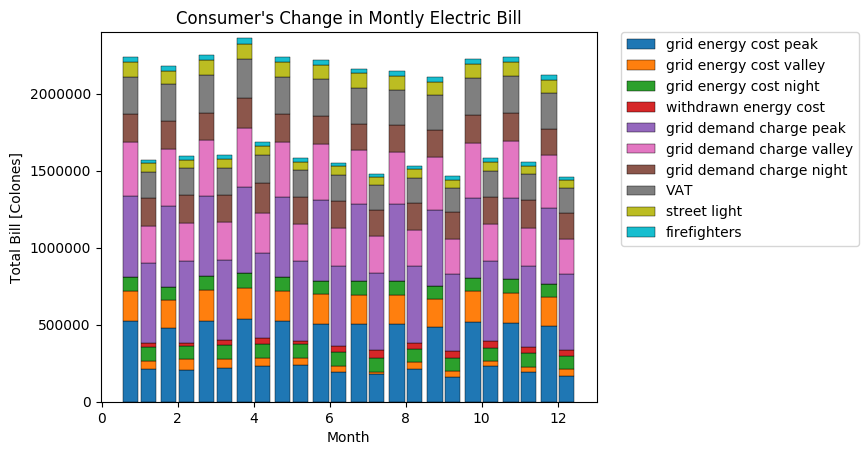

In [65]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

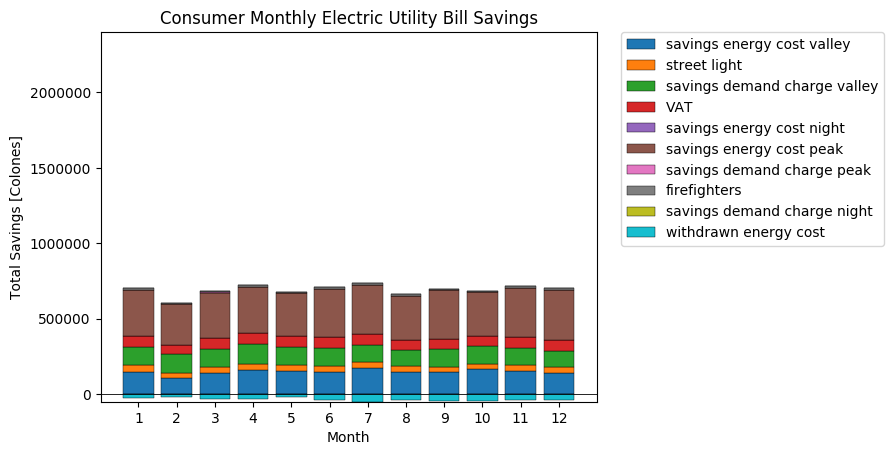

In [66]:
plot_savings(bills_TMT,2);

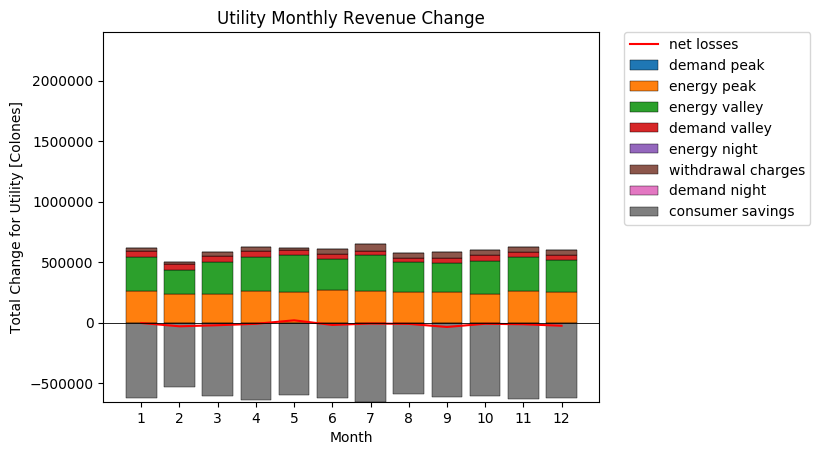

In [67]:
plot_utility_change(bills_TMT,2);

## TMT Case 3: Large PV System

In [68]:
PVTMT.capacity = 150
ts=simulate(ice_mediumvoltage, PVTMT, 3);

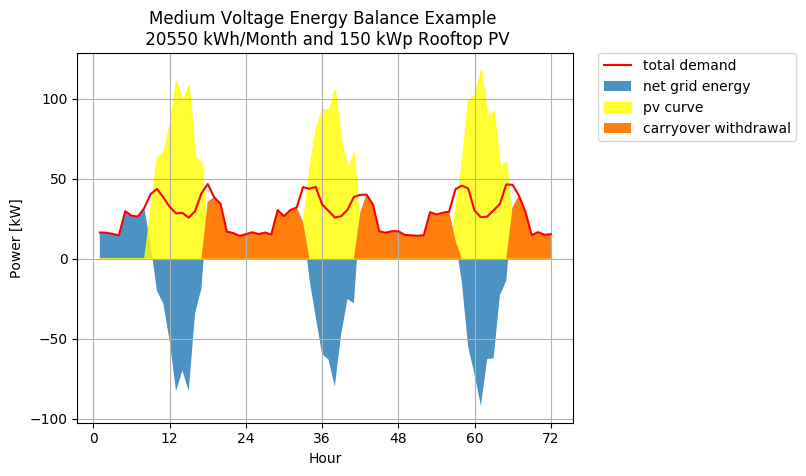

PyObject Text(0.5, 1, 'Medium Voltage Energy Balance Example \n 20550 kWh/Month and 150 kWp Rooftop PV')

In [69]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "net grid energy", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "pv curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "carryover withdrawal")
plot(hours, ts["demand_curve"], label = "total demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);
title("Medium Voltage Energy Balance Example \n 20550 kWh/Month and 150 kWp Rooftop PV")

In [70]:
ebalance = annual_energy_balance(ice_mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7572.26 7706.41 5774.94  | 22471.8 11688.02 11011.18 10269.83  | 2728.84 1766.05 5774.94  | 22471.8 10269.83 741.35  | 46.59 46.45 35.88  | 46.58 31.05 35.88 
2 | 6964.92 7087.87 5321.57  | 17332.69 7411.5 9234.37 8152.85  | 2500.86 1630.75 5321.57  | 39804.49 18422.69 0.0  | 47.38 47.21 36.37  | 47.36 31.57 36.37 
3 | 7559.44 7725.21 5779.05  | 19514.03 8885.54 10643.39 8885.54  | 2625.69 2030.47 5779.05  | 59318.52 27308.22 0.0  | 46.47 46.54 35.14  | 46.47 30.97 35.14 
4 | 7797.23 7976.63 6014.16  | 21492.71 11237.58 12289.28 11237.58  | 3701.71 1817.01 6014.16  | 80811.23 38545.8 0.0  | 49.53 49.59 38.29  | 49.4 33.11 38.29 


In [71]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], ice_mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | savings
0.0 0.0 91013.08  | 215974.6  | 521728.44 197284.22 91013.08  | 520812.74 242426.03 179409.21  | 520963.93 362615.25 179409.21  | 763853.8 
0.0 0.0 72184.23  | 171454.47  | 479883.05 181449.6 83867.91  | 529592.31 246429.13 181851.94  | 529722.35 368572.05 181851.94  | 760495.79 
0.0 0.0 91077.82  | 186862.87  | 520845.69 197765.25 91077.82  | 519557.81 241741.53 175701.13  | 519557.81 363369.23 175701.13  | 797576.92 
0.0 0.0 94783.11  | 236326.21  | 537228.99 204201.66 94783.11  | 552317.04 258479.04 191491.87  | 553858.45 387110.69 191491.87  | 775129.03 
0.0 0.0 91119.86  | 229022.49  | 521005.92 195779.24 9

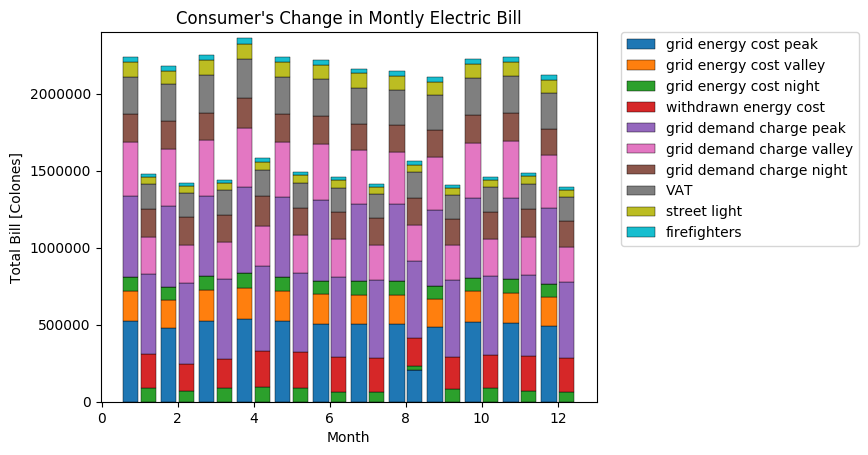

In [72]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(base_bills_TMT, bills_TMT, fields,2);

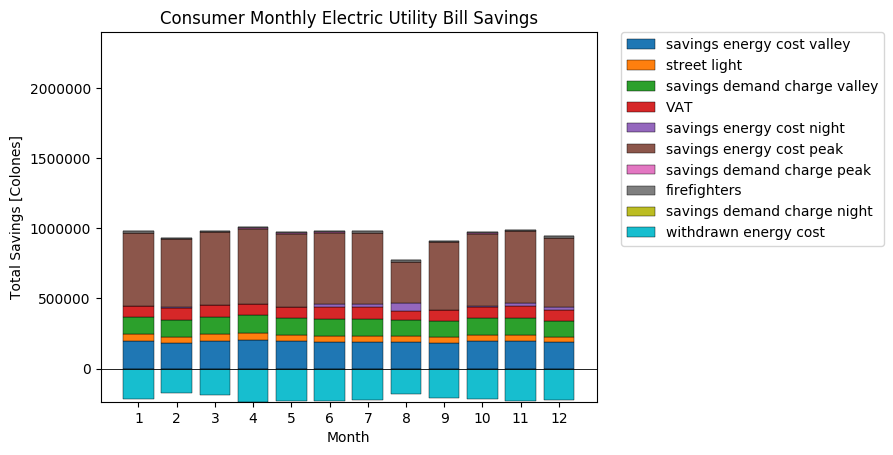

In [73]:
plot_savings(bills_TMT,2);

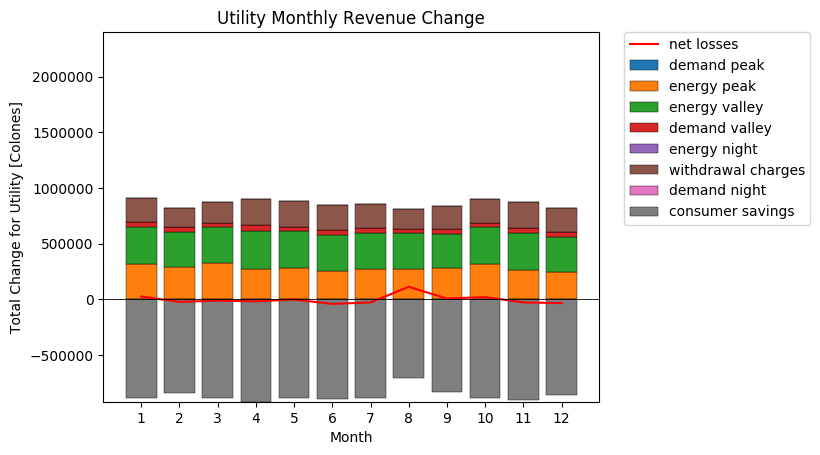

In [74]:
plot_utility_change(bills_TMT,2);